In [20]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

audio_file_path='datasets/drinking_10.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00477593 -0.00391564
  0.        ]


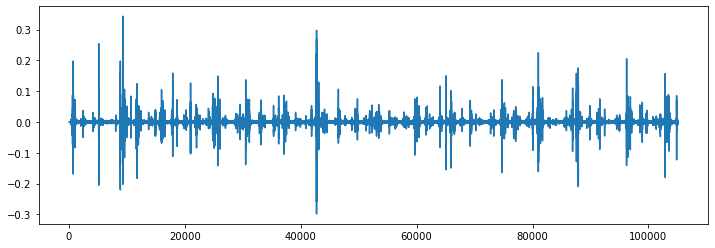

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [9]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [11]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ -34, -122],
       [-151, -210],
       [ -46, -147]], dtype=int16)

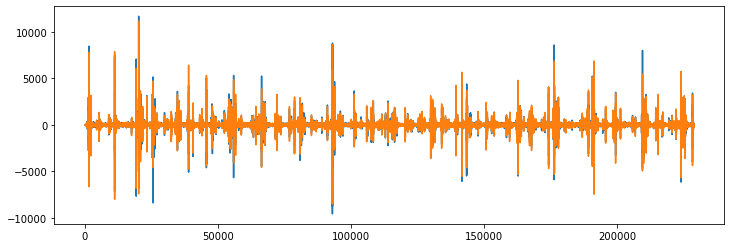

In [13]:
import matplotlib.pyplot as plt

# Original audio in stereo
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [15]:
# MFCC Extraction begin here 
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 206)


In [17]:
mfccs

array([[-322.37927   , -194.54909   , -201.7275    , ..., -287.69464   ,
        -334.10144   , -321.154     ],
       [  26.095478  ,   14.779293  ,   10.973787  , ...,   30.242895  ,
          18.90788   ,   11.457586  ],
       [ -31.343065  ,  -37.679855  ,  -47.912388  , ...,  -75.198685  ,
         -51.10906   ,  -59.65719   ],
       ...,
       [  -1.3024895 ,   -0.7278209 ,   -3.1311774 , ...,   -3.404589  ,
          -4.672339  ,   -4.1576457 ],
       [  -5.919607  ,   -7.8238487 ,   -8.107117  , ...,   -3.5696568 ,
          -4.830085  ,   -1.1150858 ],
       [   1.7500935 ,   -1.1831523 ,   -1.8647119 , ...,   -0.87912554,
           2.3141668 ,    6.3177958 ]], dtype=float32)

In [49]:
audio_dataset_path='datasets'
metadata=pd.read_csv('metadata.csv')
metadata.head(5)

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking


In [34]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [45]:
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    print(file_name)

20it [00:00, 6682.55it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_1
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_2
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_3
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_4
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_5
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_6
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_7
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_8
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_9
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_10
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_11
C:\Users

In [51]:
# Loop for extracting
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"])+'.wav')
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

4it [00:00, 34.28it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6.wav


8it [00:00, 20.00it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10.wav


13it [00:00, 17.09it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_13.wav


15it [00:00, 16.71it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_14.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_15.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_16.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_17.wav


20it [00:01, 17.04it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_18.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_19.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_20.wav


In [57]:
# converting extracted spectral features of drinking to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-328.13235, 65.59392, -38.67034, 5.4069195, -...",drinking
1,"[-349.1521, 42.501, -31.456572, 26.431646, -8....",drinking
2,"[-320.457, 63.11254, -37.251663, 11.011499, -7...",drinking
3,"[-372.14014, 41.927353, -35.56491, 37.086433, ...",drinking
4,"[-391.85886, 51.45333, -27.665045, 38.51123, -...",drinking
5,"[-393.057, 52.509537, -32.272507, 42.311592, -...",drinking
6,"[-369.73642, 54.400322, -21.231102, 18.65339, ...",drinking
7,"[-367.96658, 33.382534, -21.234934, 23.701822,...",drinking
8,"[-374.245, 40.232742, -26.485298, 29.021275, -...",drinking
9,"[-329.38553, 47.81891, -35.86021, 9.928306, -2...",drinking


In [55]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(20, 40)

In [56]:
y

array(['drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking'],
      dtype='<U8')